In [1]:
import sys
sys.path.append("../..")
import module.components.CONST as CONST
from module.base.network import Network
from module.simulation.meanfield import MeanField
from module.simulation.quick_meanfield2 import QuickMeanField2
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import scipy

/tmp/ipykernel_3464/3204779560.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [241]:
def fft(signal):
    n_0 = int(signal.shape[-1] / 2)
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1]) / dt * 2 * np.pi

    return freq[0:n_0], signal_fft[0:n_0]

def fft_amp(signal):
    n_0 = int(signal.shape[-1] / 2)
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1]) / dt * 2 * np.pi

    return freq[0:n_0], np.abs(signal_fft[0:n_0])

def fft_phase(signal):
    n_0 = int(signal.shape[-1] / 2)
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1]) / dt * 2 * np.pi

    return freq[0:n_0], np.angle(signal_fft[0:n_0])

In [242]:
#dt = 0.001 #zu schnell
dt = 0.01    # fest
t_max = 100
N = int(t_max / dt)
ts = np.linspace(0, t_max, N)
print("N =", N)

N = 10000


In [254]:
sigma_x = 0.1
k = 0.98

In [255]:
def next_U(U):
    return k * U + np.random.randn() * sigma_x * np.sqrt(1 - k**2)

In [256]:
Us = [0]
for i in range(N - 1):
    Us.append(next_U(Us[-1]))

In [257]:
#Us = np.sin(3 * ts) * 0.1
Us = np.array(Us)

In [258]:
net = Network(3, 3, 1, [[0,0,0], [2,0,0],[0,2,0],[2,2,0]])
qmf2 = QuickMeanField2(net)

In [259]:
Is = []
for i in range(N):
    net.set_voltage_config([Us[i], 0, 0, 0], 0)
    qmf2.numeric_integration_solve(N = 1, dt = dt, reset = False)
    Is.append(qmf2.calc_expected_electrode_current(3))

In [260]:
Is = np.array(Is)

(0.0, 20.0)

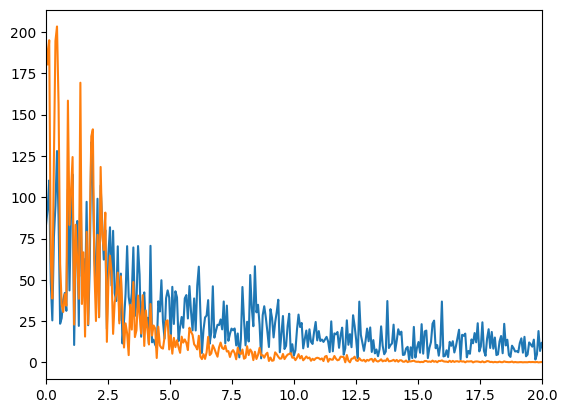

In [313]:
freq, U_amp = fft_amp(Us)
freq, I_amp = fft_amp(Is)

plt.plot(freq, U_amp)
plt.plot(freq, I_amp)
plt.xlim(0, 20)

#plt.yscale("log")

#plt.ylim(0, 125)

In [278]:
UU_corr = scipy.signal.correlate(Us, Us[:N - 1000], mode ="valid")

In [281]:
I0 = -(Is - np.mean(Is))

IU_corr = scipy.signal.correlate(Us, I0[1000:], mode = "valid")

In [300]:
len(IU_corr)

1001

(0.0, 5.0)

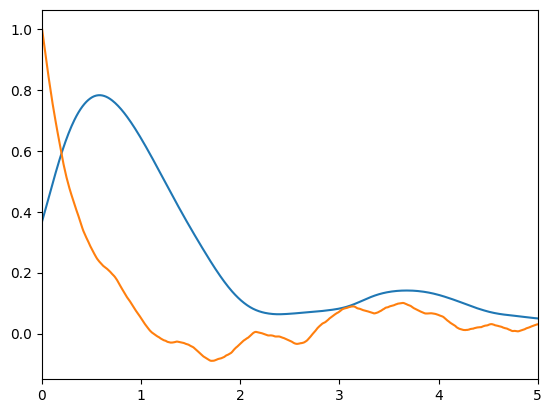

In [311]:
plt.plot(np.arange(len(IU_corr)) * dt, np.flip(IU_corr) / np.sqrt(np.std(Is) * np.std(Us)) / 800)
plt.plot(np.arange(len(UU_corr)) * dt, UU_corr / np.std(Us) / 800)

plt.xlim(0, 5)

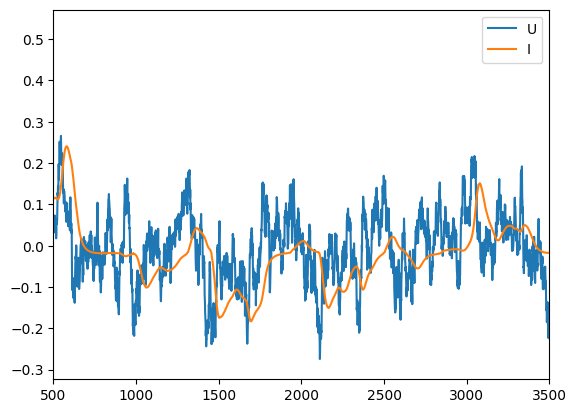

In [284]:
plt.plot(Us, label = "U")
plt.plot(-(Is - np.mean(Is)), label = "I")
plt.xlim(500, 3500)

plt.legend()